## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 3

### Consider the following datasets:
#### A. Fashion MNIST dataset [Fashion MNIST dataset, an alternative to MNIST (keras.io)],
### For each of the Datasets A and B, do the following:
### Q1. Understanding the Dataset and Pre-processing: Implement the following:
#### a. Compute and display the number of classes.
#### b. Compute and display the dimensions of each image.
#### c. Display one image from each class.
#### d. Perform normalization.
### Q2. Performing experiments on Fully Connected Neural Networks (FCNN):
#### a. Design a FCNN which is most suitable for the given dataset:
#### Experimentally choose the best network (the intuitions and learnings from the experiments you have performed in Week-1 and Week-2 will help you choose the hyperparameters for the network).
#### b. Train and test the network (choose the best epoch size so that there is no overfitting).
#### c. Plot the performance curves.
### Q3. Performing experiments on a Convolutional Neural Networks (CNNs):
#### a. Design CNN-1 which contains:
#### • One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0.
#### • One Pooling layer which uses MAXPOOLING with stride =2.
#### • One hidden layer having number of neurons = 100
#### b. Design CNN-2 which contains:
#### • Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1, and padding =0.
#### • One Pooling layer which uses MAXPOOLING with stride =2.
#### • One hidden layer having number of neurons = 100
#### Note: use ReLU activation function after each convolution layer.
#### c. Train and test the networks (choose the best epoch size so that there is no overfitting).
#### d. Plot the performance curves for CNN-1 and CNN-2.
#### e. Compare the performances of CNN-1 and CNN-2.
### Q4. Compare the performances of FCNN and CNN.
### Q5. Compare the number of parameters in the FCNN and the CNN. Which layer/s in CNN contribute most to the total number of parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.backend import image_data_format
from keras.callbacks import History
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

2024-08-14 10:19:33.956736: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-14 10:19:33.985576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 10:19:34.419907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [6]:
x_train[0].shape

(28, 28)

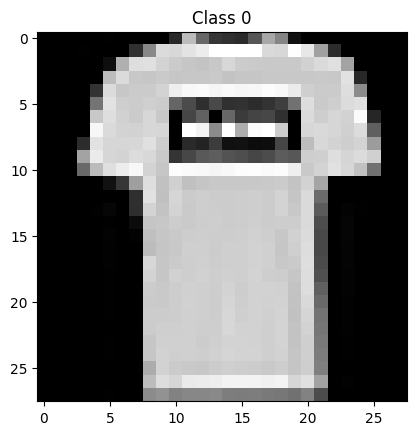

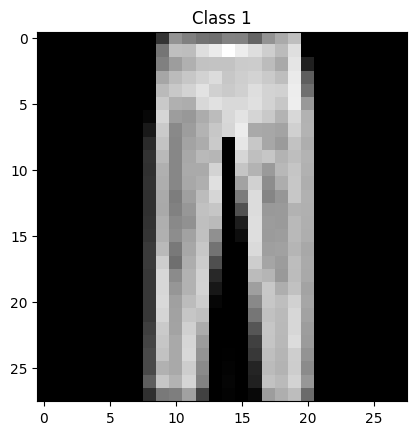

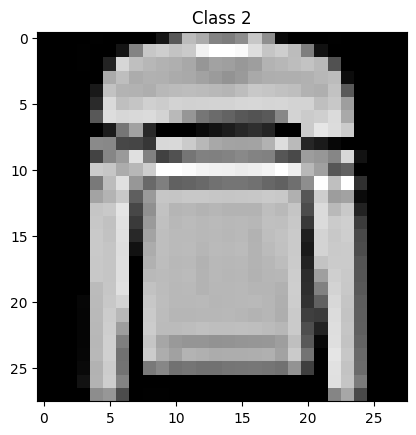

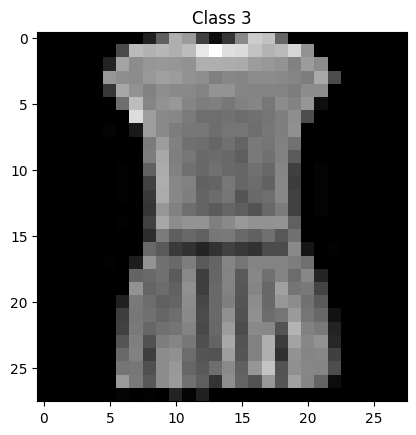

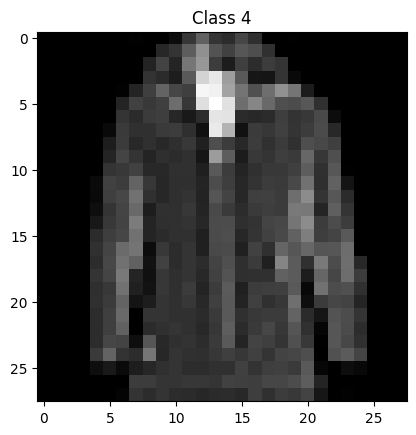

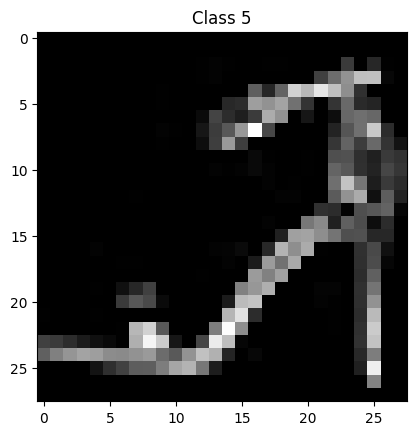

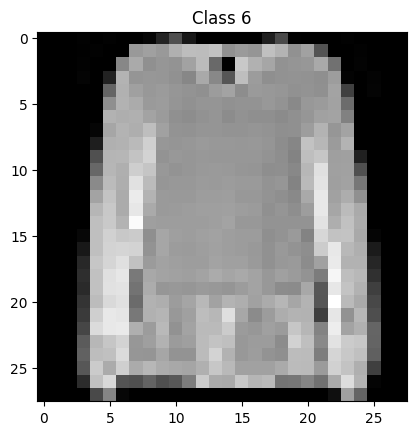

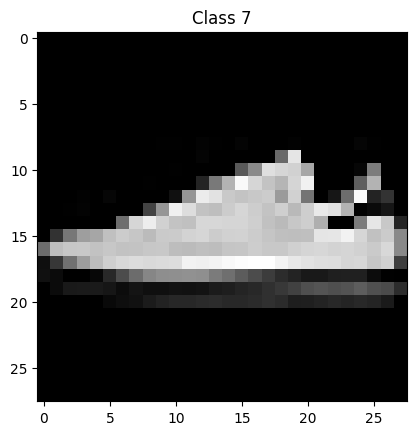

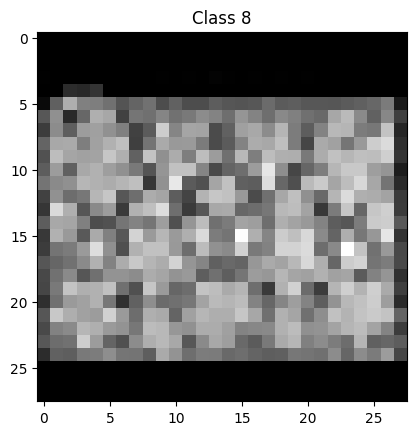

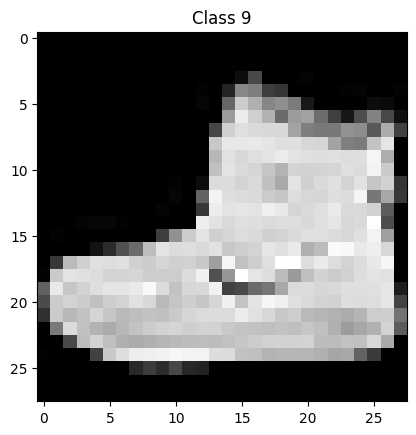

In [7]:
for i in np.unique(y_train):
    temp: pd.Series = train_data[train_data.y_train == i].iloc[0]
    plt.imshow(temp.x_train, cmap="gray")
    plt.title(f"Class {temp.y_train}")
    plt.show()

In [8]:
current_shape: tuple = x_train[0].shape

# The first param to reshape() is the length of the array
imageFormat: str = image_data_format()
if imageFormat == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, current_shape[0], current_shape[1])
    x_test = x_test.reshape(x_test.shape[0], 1, current_shape[0], current_shape[1])
elif imageFormat == "channels_last":
        x_train = x_train.reshape(x_train.shape[0], current_shape[0], current_shape[1], 1)
        x_test = x_test.reshape(x_test.shape[0], current_shape[0], current_shape[1], 1)
else:
    print(f"Invalid format encountered: {image_data_format()}")

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
fcnn_model: Sequential = Sequential([
    Input(shape=x_train[0].shape),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])
fcnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

2024-08-14 10:19:36.008234: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-14 10:19:36.024455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-14 10:19:36.024581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
epochs: int = 5
batch_size: int = 128
fcnn_history: History = fcnn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5


2024-08-14 10:19:37.611056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-08-14 10:19:37.612519: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdb7909e1f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-14 10:19:37.612533: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-14 10:19:37.615832: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-14 10:19:37.714026: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-08-14 10:19:37.787273: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

422/422 [==============================] - 3s 4ms/step - loss: 0.5852 - accuracy: 0.7972 - val_loss: 0.4383 - val_accuracy: 0.8515
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.4017 - accuracy: 0.8568 - val_loss: 0.4175 - val_accuracy: 0.8480
Epoch 3/5
422/422 [==============================] - 2s 5ms/step - loss: 0.3583 - accuracy: 0.8723 - val_loss: 0.3630 - val_accuracy: 0.8663
Epoch 4/5
422/422 [==============================] - 2s 5ms/step - loss: 0.3320 - accuracy: 0.8798 - val_loss: 0.3442 - val_accuracy: 0.8708
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.3125 - accuracy: 0.8870 - val_loss: 0.3405 - val_accuracy: 0.8812


In [12]:
fcnn_model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8720


[0.3579344153404236, 0.871999979019165]

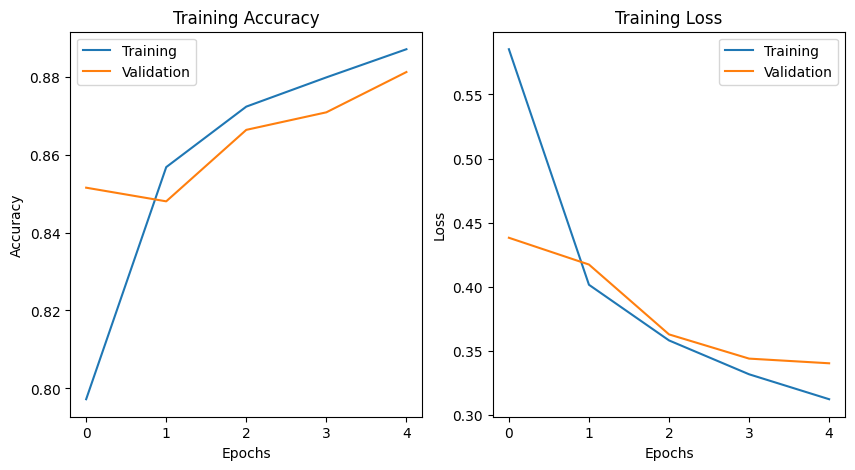

In [13]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Training Accuracy")
ax1.plot(fcnn_history.history["accuracy"])
ax1.plot(fcnn_history.history["val_accuracy"])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Training Loss")
ax2.plot(fcnn_history.history["loss"])
ax2.plot(fcnn_history.history["val_loss"])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Training", "Validation"])

In [14]:
cnn_model_1: Sequential = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, 5, activation="relu") # Padding and strides match their defaults
])

In [15]:
cnn_model_1.add(MaxPooling2D(strides=2))

In [16]:
cnn_model_1.add(Flatten()) # Flatten the outputs of CNN
cnn_model_1.add(Dense(100, activation="relu"))

In [17]:
cnn_model_1.add(Dense(10, activation="softmax"))

In [18]:
cnn_model_2: Sequential = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, 3, activation="relu"), # Padding and strides match their defaults
    Conv2D(32, 3, activation="relu")
])

In [19]:
cnn_model_2.add(MaxPooling2D(strides=2))

In [20]:
cnn_model_2.add(Flatten()) # Flatten the outputs of CNN
cnn_model_2.add(Dense(100, activation="relu"))

In [21]:
cnn_model_2.add(Dense(10, activation="softmax"))

In [22]:
epochs = 5

cnn_model_1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
cnn1_history: History = cnn_model_1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 3s 5ms/step - loss: 0.5052 - accuracy: 0.8238 - val_loss: 0.3633 - val_accuracy: 0.8710
Epoch 2/5
422/422 [==============================] - 2s 5ms/step - loss: 0.3331 - accuracy: 0.8830 - val_loss: 0.3170 - val_accuracy: 0.8867
Epoch 3/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2859 - accuracy: 0.8974 - val_loss: 0.3039 - val_accuracy: 0.8903
Epoch 4/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2562 - accuracy: 0.9066 - val_loss: 0.2808 - val_accuracy: 0.8952
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2331 - accuracy: 0.9150 - val_loss: 0.2772 - val_accuracy: 0.9002


In [23]:
cnn_model_1.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8971


[0.28827789425849915, 0.8970999717712402]

In [24]:
epochs = 5

cnn_model_2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
cnn2_history: History = cnn_model_2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 4s 6ms/step - loss: 0.4636 - accuracy: 0.8349 - val_loss: 0.3277 - val_accuracy: 0.8842
Epoch 2/5
422/422 [==============================] - 2s 6ms/step - loss: 0.2937 - accuracy: 0.8959 - val_loss: 0.2743 - val_accuracy: 0.8980
Epoch 3/5
422/422 [==============================] - 2s 6ms/step - loss: 0.2448 - accuracy: 0.9113 - val_loss: 0.2757 - val_accuracy: 0.8995
Epoch 4/5
422/422 [==============================] - 2s 6ms/step - loss: 0.2088 - accuracy: 0.9240 - val_loss: 0.2381 - val_accuracy: 0.9145
Epoch 5/5
422/422 [==============================] - 2s 6ms/step - loss: 0.1847 - accuracy: 0.9322 - val_loss: 0.2326 - val_accuracy: 0.9200


In [25]:
cnn_model_2.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.9129


[0.24615374207496643, 0.9128999710083008]

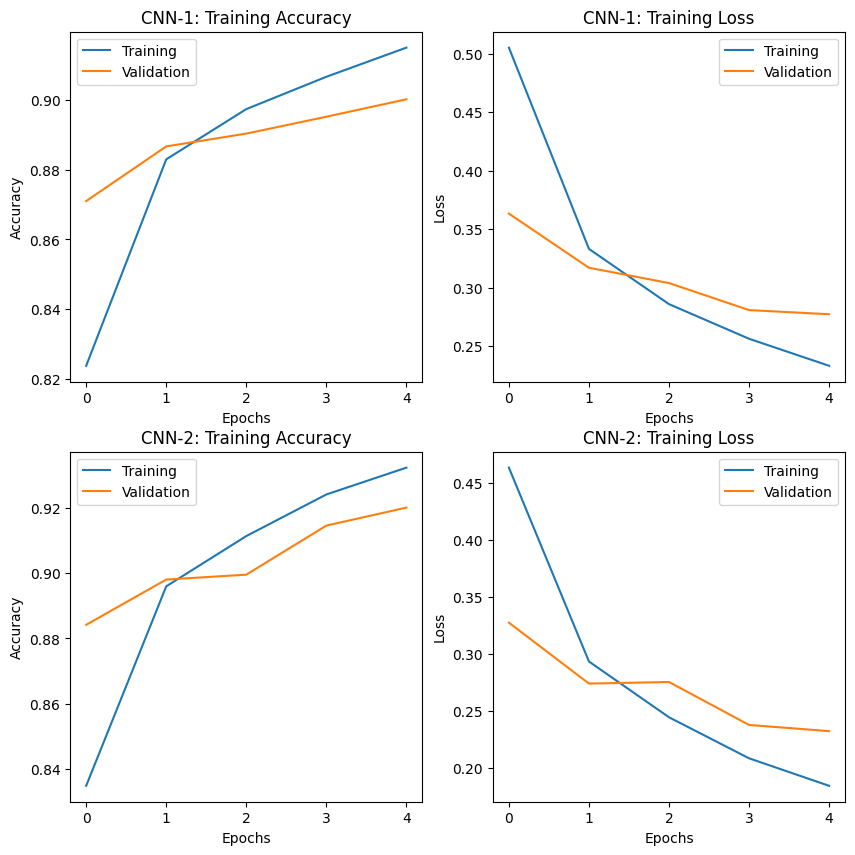

In [26]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title("CNN-1: Training Accuracy")
ax1.plot(cnn1_history.history["accuracy"])
ax1.plot(cnn1_history.history["val_accuracy"])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2 = plt.subplot(2, 2, 2)
ax2.set_title("CNN-1: Training Loss")
ax2.plot(cnn1_history.history["loss"])
ax2.plot(cnn1_history.history["val_loss"])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Training", "Validation"])

ax3 = plt.subplot(2, 2, 3)
ax3.set_title("CNN-2: Training Accuracy")
ax3.plot(cnn2_history.history["accuracy"])
ax3.plot(cnn2_history.history["val_accuracy"])
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])

ax4 = plt.subplot(2, 2, 4)
ax4.set_title("CNN-2: Training Loss")
ax4.plot(cnn2_history.history["loss"])
ax4.plot(cnn2_history.history["val_loss"])
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Loss")
ax4.legend(["Training", "Validation"])

In [27]:
cnn_model_1.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.8971


[0.28827789425849915, 0.8970999717712402]

In [28]:
cnn_model_2.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9129


[0.24615374207496643, 0.9128999710083008]

In [29]:
fcnn_model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 923us/step - loss: 0.3579 - accuracy: 0.8720


[0.3579344153404236, 0.871999979019165]

In [30]:
cnn_model_2.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9129


[0.24615374207496643, 0.9128999710083008]

In [31]:
fcnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               460900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                      